In [1]:
from pyscenic.rnkdb import RankingDatabase
from pyscenic.genesig import GeneSignature, Regulome
from pyscenic.recovery import enrichment, leading_edge
import matplotlib.pyplot as plt
from functools import partial
import glob
import os
from dask import delayed
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

Gene signatures are downloaded from MSigDB (http://software.broadinstitute.org/gsea/msigdb). The module C6 is used in this notebook.

In [3]:
GMT_FNAME = "/Users/u0043358/Projects/resources/c6.all.v6.1.symbols.gmt.txt"

In [4]:
msigdb_c6 = GeneSignature.from_gmt(
                        fname=GMT_FNAME,
                        nomenclature="HGNC",
                        gene_separator="\t",
                        field_separator="\t")
len(msigdb_c6)

189

In [5]:
msigdb_c6[0]

GeneSignature(name='GLI1_UP.V1_DN', nomenclature='HGNC', gene2weights=<frozendict {'COPZ1': 1.0, 'C10orf46': 1.0, 'C20orf118': 1.0, 'TMEM181': 1.0, 'CCNL2': 1.0, 'YIPF1': 1.0, 'GTDC1': 1.0, 'OPN3': 1.0, 'RSAD2': 1.0, 'SLC22A1': 1.0, 'LIN37': 1.0, 'RNF10': 1.0, 'RUNX1': 1.0, 'QRICH2': 1.0, 'SEPT9': 1.0, 'ARPC2': 1.0, 'CD2AP': 1.0, 'ACSL6': 1.0, 'ZMYND11': 1.0, 'BBX': 1.0, 'TMEM62': 1.0, 'FOLR1': 1.0, 'TMEM189': 1.0, 'PPIL1': 1.0, 'CYP3A7': 1.0, 'SELM': 1.0, 'ESYT1': 1.0, 'BTBD16': 1.0, 'SPECC1': 1.0}>)

Make connection to a database of whole genome rankings.

In [6]:
DB_GLOB = "/Users/u0043358/Projects/databases/hg19-*.db"

In [7]:
db_fnames = glob.glob(DB_GLOB)
db_fnames

['/Users/u0043358/Projects/databases/hg19-tss-centered-5kb-10species.mc9nr.db',
 '/Users/u0043358/Projects/databases/hg19-500bp-upstream-10species.mc9nr.db',
 '/Users/u0043358/Projects/databases/hg19-tss-centered-10kb-7species.mc9nr.db',
 '/Users/u0043358/Projects/databases/hg19-500bp-upstream-7species.mc9nr.db',
 '/Users/u0043358/Projects/databases/hg19-tss-centered-5kb-7species.mc9nr.db',
 '/Users/u0043358/Projects/databases/hg19-tss-centered-10kb-10species.mc9nr.db']

In [8]:
def name(fname):
    return os.path.basename(fname).split(".")[0]
dbs = [RankingDatabase(fname=fname, name=name(fname), nomenclature="HGNC") for fname in db_fnames]

In [9]:
dbs

[RankingDatabase(name="hg19-tss-centered-5kb-10species",n_features=24453),
 RankingDatabase(name="hg19-500bp-upstream-10species",n_features=24453),
 RankingDatabase(name="hg19-tss-centered-10kb-7species",n_features=24453),
 RankingDatabase(name="hg19-500bp-upstream-7species",n_features=24453),
 RankingDatabase(name="hg19-tss-centered-5kb-7species",n_features=24453),
 RankingDatabase(name="hg19-tss-centered-10kb-10species",n_features=24453)]

Look for enrichment of a gene signature.

In [10]:
df = enrichment(dbs[0], msigdb_c6[0]).sort_values(by=('Enrichment', 'NES'), ascending=False)
df[('Metadata', 'Signature')] = msigdb_c6[0].name
df[('Metadata', 'Database')] = dbs[0].name

In [11]:
len(df)

24453

In [12]:
df.head()

Enrichment            \
                                                          AUC       NES   
predrem__nrMotif81                                   0.000223  5.126996   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...   0.000212  4.789967   
cisbp__M3230                                         0.000208  4.673257   
hocomoco__ZIM3_HUMAN.H11MO.0.C                       0.000203  4.516057   
transfac_pro__M06436                                 0.000202  4.502957   

                                                   Recovery                 \
                                                          0    1    2    3   
predrem__nrMotif81                                      0.0  0.0  0.0  0.0   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...      0.0  0.0  0.0  0.0   
cisbp__M3230                                            0.0  0.0  0.0  0.0   
hocomoco__ZIM3_HUMAN.H11MO.0.C                          0.0  0.0  0.0  0.0   
transfac_pro__M06436                                    0.0  0.0  0.0  0.0   

                                                                        \
                                                      4    5    6    7   
predrem__nrMotif81                                  0.0  0.0  0.0  0.0   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...  0.0  0.0  0.0  0.0   
cisbp__M3230                                        0.0  0.0  0.0  0.0   
hocomoco__ZIM3_HUMAN.H11MO.0.C                      0.0  0.0  0.0  0.0   
transfac_pro__M06436                                0.0  0.0  0.0  0.0   

                                                                 ...                 \
                                                                 ...                  
predrem__nrMotif81                                               ...                  
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...               ...                  
cisbp__M3230                                                     ...                  
hocomoco__ZIM3_HUMAN.H11MO.0.C                                   ...                  
transfac_pro__M06436                                             ...                  

                                                   Ranking                 \
                                                     SEPT9 SLC22A1 SPECC1   
predrem__nrMotif81                                     167   13245   8538   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...     198   11066  12243   
cisbp__M3230                                            43    2423   2552   
hocomoco__ZIM3_HUMAN.H11MO.0.C                        2496    6671   3171   
transfac_pro__M06436                                   120   17079   6585   

                                                                           \
                                                   TMEM181 TMEM189 TMEM62   
predrem__nrMotif81                                     111   13463     85   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...    4486     990    250   
cisbp__M3230                                         13525   18634    773   
hocomoco__ZIM3_HUMAN.H11MO.0.C                        9306   13108    330   
transfac_pro__M06436                                 19020   12863   4175   

                                                                  \
                                                   YIPF1 ZMYND11   
predrem__nrMotif81                                  2483     719   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...   154    4134   
cisbp__M3230                                         350    4661   
hocomoco__ZIM3_HUMAN.H11MO.0.C                      3078   12106   
transfac_pro__M06436                                3315    7253   

                                                         Metadata  \
                                                        Signature   
predrem__nrMotif81                                  GLI1_UP.V1_DN   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...  GLI1_UP.V1_DN   
cisbp__M3230    

(array([  5.49400000e+03,   6.40000000e+03,   5.58500000e+03,
          3.76100000e+03,   1.99000000e+03,   8.27000000e+02,
          2.73000000e+02,   9.50000000e+01,   2.30000000e+01,
          5.00000000e+00]),
 array([  0.00000000e+00,   2.23409442e-05,   4.46818885e-05,
          6.70228327e-05,   8.93637770e-05,   1.11704721e-04,
          1.34045665e-04,   1.56386610e-04,   1.78727554e-04,
          2.01068498e-04,   2.23409442e-04]),
 <a list of 10 Patch objects>)

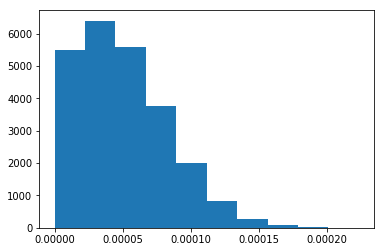

In [13]:
plt.hist(df[('Enrichment', 'AUC')])

In [ ]:
def auc_histogram(df, nes_threshold, n_bins=100, normalize=True):
    auc = numpy.empty(shape=0, dtype=numpy.float_)

    for curve in curves:
        datasets.append(curve.aucs)
        aucs = numpy.append(aucs, curve.aucs)

    n = len(curves)
    bin_edges = numpy.linspace(start=aucs.min(), stop=aucs.max(), num=n_bins + 1, endpoint=True)
    bin_width = bin_edges[1] - bin_edges[0]

    histogram = numpy.full(shape=(n_bins, n), fill_value=0, dtype=numpy.float_ if normalize else numpy.int_)
    means = numpy.empty(shape=n)
    stdevs = numpy.empty(shape=n)

    for idx in range(n):
        ns, dummy = numpy.histogram(datasets[idx], bins=bin_edges)
        means[idx] = datasets[idx].mean()
        stdevs[idx] = datasets[idx].std()

        if normalize:
            histogram[:, idx] = ns / numpy.float_(len(datasets[idx]))
        else:
            histogram[:, idx] = ns

    max_n = histogram.max()

    plots = []

    for idx in numpy.arange(n):
        p = pylab.bar(bin_edges[:-1], histogram[:, idx], color=curve_attributes[idx].color, width=bin_width, alpha=0.5)
        auc_threshold = (nes_threshold * stdevs[idx]) + means[idx]
        pylab.plot([auc_threshold, auc_threshold], [0, max_n], color=curve_attributes[idx].color, linestyle=':')
        plots.append(p[0])

    pylab.xlabel('AUC')
    pylab.ylabel('p' if normalize else 'N')
    pylab.xlim(bin_edges[[0, -1]])
    pylab.ylim([0, max_n])
    pylab.legend(plots,
                 ["{0:s}\n$\mu={1:.4g},\sigma={2:.4g}$".format(curve_attributes[idx].name,
                                                               means[idx],
                                                               stdevs[idx])
                  for idx in numpy.arange(n)],
                 loc=1,
                 prop={'size': 8})

    figure_output = cStringIO.StringIO()

    pylab.savefig(figure_output, format='png')
    pylab.clf()

    try:
        # Save figure in PNG format with a color palette (PseudoClass) instead of using truecolor (DirectClass).
        # Saving the PNG file with a color palette results in a filesize that is 3 times smaller.
        with wand.image.Image(blob=figure_output.getvalue()) as figure_image:
            figure_image.type = 'palette'
            figure_image.save(filename=filename)
    except wand.exceptions.CoderError:
        # Sometimes Wand throws the following error:
        #     CoderError: WriteBlob Failed `filename.png' @ error/png.c/MagickPNGErrorHandler/1728
        # If this happens, just write the unoptimized PNG file.
        with open(filename, 'w') as fh:
            fh.write(figure_output.getvalue())

In [14]:
len(df[df[('Enrichment', 'NES')] >= 2.5])

386

In [15]:
avgrcc = df['Recovery'].mean(axis=0)
stdrcc = df['Recovery'].std(axis=0)
avg2stdrcc = avgrcc + 2.0 * stdrcc

In [16]:
df[('Enrichment', 'LE')] = df[df[('Enrichment', 'NES')] >= 2.5][['Recovery', 'Ranking']].apply(
    partial(leading_edge, avg2stdrcc=avg2stdrcc, genes=df['Ranking'].columns.values, nomenclature="HGNC"),
    axis=1)

In [17]:
df.head()

Enrichment            \
                                                          AUC       NES   
predrem__nrMotif81                                   0.000223  5.126996   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...   0.000212  4.789967   
cisbp__M3230                                         0.000208  4.673257   
hocomoco__ZIM3_HUMAN.H11MO.0.C                       0.000203  4.516057   
transfac_pro__M06436                                 0.000202  4.502957   

                                                   Recovery                 \
                                                          0    1    2    3   
predrem__nrMotif81                                      0.0  0.0  0.0  0.0   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...      0.0  0.0  0.0  0.0   
cisbp__M3230                                            0.0  0.0  0.0  0.0   
hocomoco__ZIM3_HUMAN.H11MO.0.C                          0.0  0.0  0.0  0.0   
transfac_pro__M06436                                    0.0  0.0  0.0  0.0   

                                                                        \
                                                      4    5    6    7   
predrem__nrMotif81                                  0.0  0.0  0.0  0.0   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...  0.0  0.0  0.0  0.0   
cisbp__M3230                                        0.0  0.0  0.0  0.0   
hocomoco__ZIM3_HUMAN.H11MO.0.C                      0.0  0.0  0.0  0.0   
transfac_pro__M06436                                0.0  0.0  0.0  0.0   

                                                                          ...                          \
                                                                          ...                           
predrem__nrMotif81                                                        ...                           
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...                        ...                           
cisbp__M3230                                                              ...                           
hocomoco__ZIM3_HUMAN.H11MO.0.C                                            ...                           
transfac_pro__M06436                                                      ...                           

                                                   Ranking                 \
                                                   SLC22A1 SPECC1 TMEM181   
predrem__nrMotif81                                   13245   8538     111   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...   11066  12243    4486   
cisbp__M3230                                          2423   2552   13525   
hocomoco__ZIM3_HUMAN.H11MO.0.C                        6671   3171    9306   
transfac_pro__M06436                                 17079   6585   19020   

                                                                         \
                                                   TMEM189 TMEM62 YIPF1   
predrem__nrMotif81                                   13463     85  2483   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...     990    250   154   
cisbp__M3230                                         18634    773   350   
hocomoco__ZIM3_HUMAN.H11MO.0.C                       13108    330  3078   
transfac_pro__M06436                                 12863   4175  3315   

                                                                 Metadata  \
                                                   ZMYND11      Signature   
predrem__nrMotif81                                     719  GLI1_UP.V1_DN   
taipale_tf_pairs__E2F3_FOXI1_NNMCACCGCGCCCMN_CA...    4134  GLI1_UP.V1_DN   
cisbp__M3230                                          4661  GLI1_UP.V1_DN   
hocomoco__ZIM3_HUMAN.H11MO.0.C                       12106  GLI1_UP.V1_DN   
transfac_pro__M06436                                  7253  GLI1_UP.V1_DN   

                                                                                     \
                              

Create parallelized version

In [18]:
@delayed
def combine(db, gs):
    df = enrichment(db, gs).sort_values(by=('Enrichment', 'NES'), ascending=False)
    df[('Metadata', 'Signature')] = gs.name
    df[('Metadata', 'Database')] = db.name
    # add tf as metadata if available
    return df[df[('Enrichment', 'NES')] >= 2.5]
    
@delayed
def add_le(df):
    avgrcc = df['Recovery'].mean(axis=0)
    stdrcc = df['Recovery'].std(axis=0)
    avg2stdrcc = avgrcc + 2.0 * stdrcc
    df[('Enrichment', 'LE')] = df[['Recovery', 'Ranking']].apply(
                        partial(leading_edge,
                                avg2stdrcc=avg2stdrcc,
                                genes=df['Ranking'].columns.values,
                                nomenclature="HGNC"),
                        axis=1)
    return df
    
@delayed
def add_tf(df):
    # add columns from motif2TF
    # filter on combinations of the proper TFs
    # create regulomes.
    return df

@delayed
def concat(dfs):
    return pd.concat(dfs)

tasks1 = [combine(db, gs) for db in dbs[0:2] for gs in msigdb_c6[0:2]]
tasks2 = [add_le(task) for task in tasks1]
res = concat(tasks2)

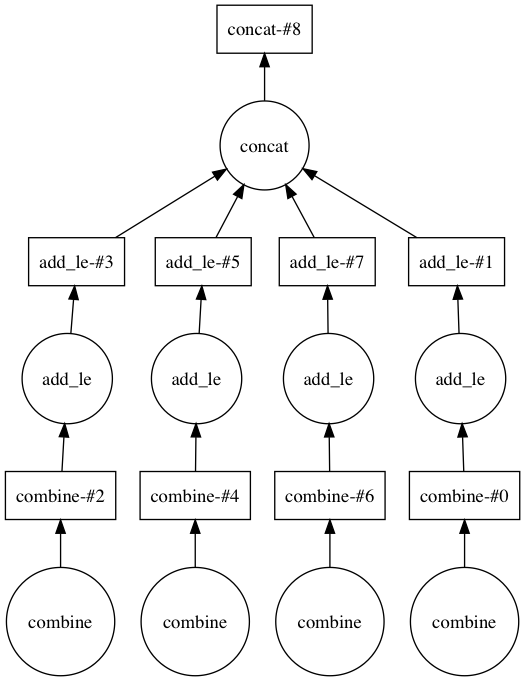

In [19]:
from dask.dot import dot_graph
dot_graph(res.dask)

In [20]:
from dask.multiprocessing import get
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof, CacheProfiler() as cprof:
    res.compute(get=get, num_workers=4)

In [22]:
from bokeh.io import output_notebook, push_notebook, show
output_notebook()
from dask.diagnostics import visualize
visualize([prof, rprof, cprof])

Loading BokehJS ...

Column(id='2577cd7e-eebd-46b8-aff0-84c870ff9c0a', ...)